In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

In [2]:
car_data = pd.read_csv("car data.csv")

In [3]:
car_data.shape

(301, 9)

In [4]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [10]:
# encoding "Fuel_Type" Column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
del car_data['Owner']

In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,2014,3.35,5.59,27000,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0


In [14]:
# Find today's date for check that how much car is old

import datetime

Y = datetime.datetime.now()
Y.year

2023

In [15]:
car_data['No_of_Years'] = Y.year - car_data.Year

In [16]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,No_of_Years
0,ritz,2014,3.35,5.59,27000,0,0,0,9
1,sx4,2013,4.75,9.54,43000,1,0,0,10
2,ciaz,2017,7.25,9.85,6900,0,0,0,6
3,wagon r,2011,2.85,4.15,5200,0,0,0,12
4,swift,2014,4.60,6.87,42450,1,0,0,9


In [17]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [18]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     No_of_Years  
0              9  
1             10  
2     

In [19]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


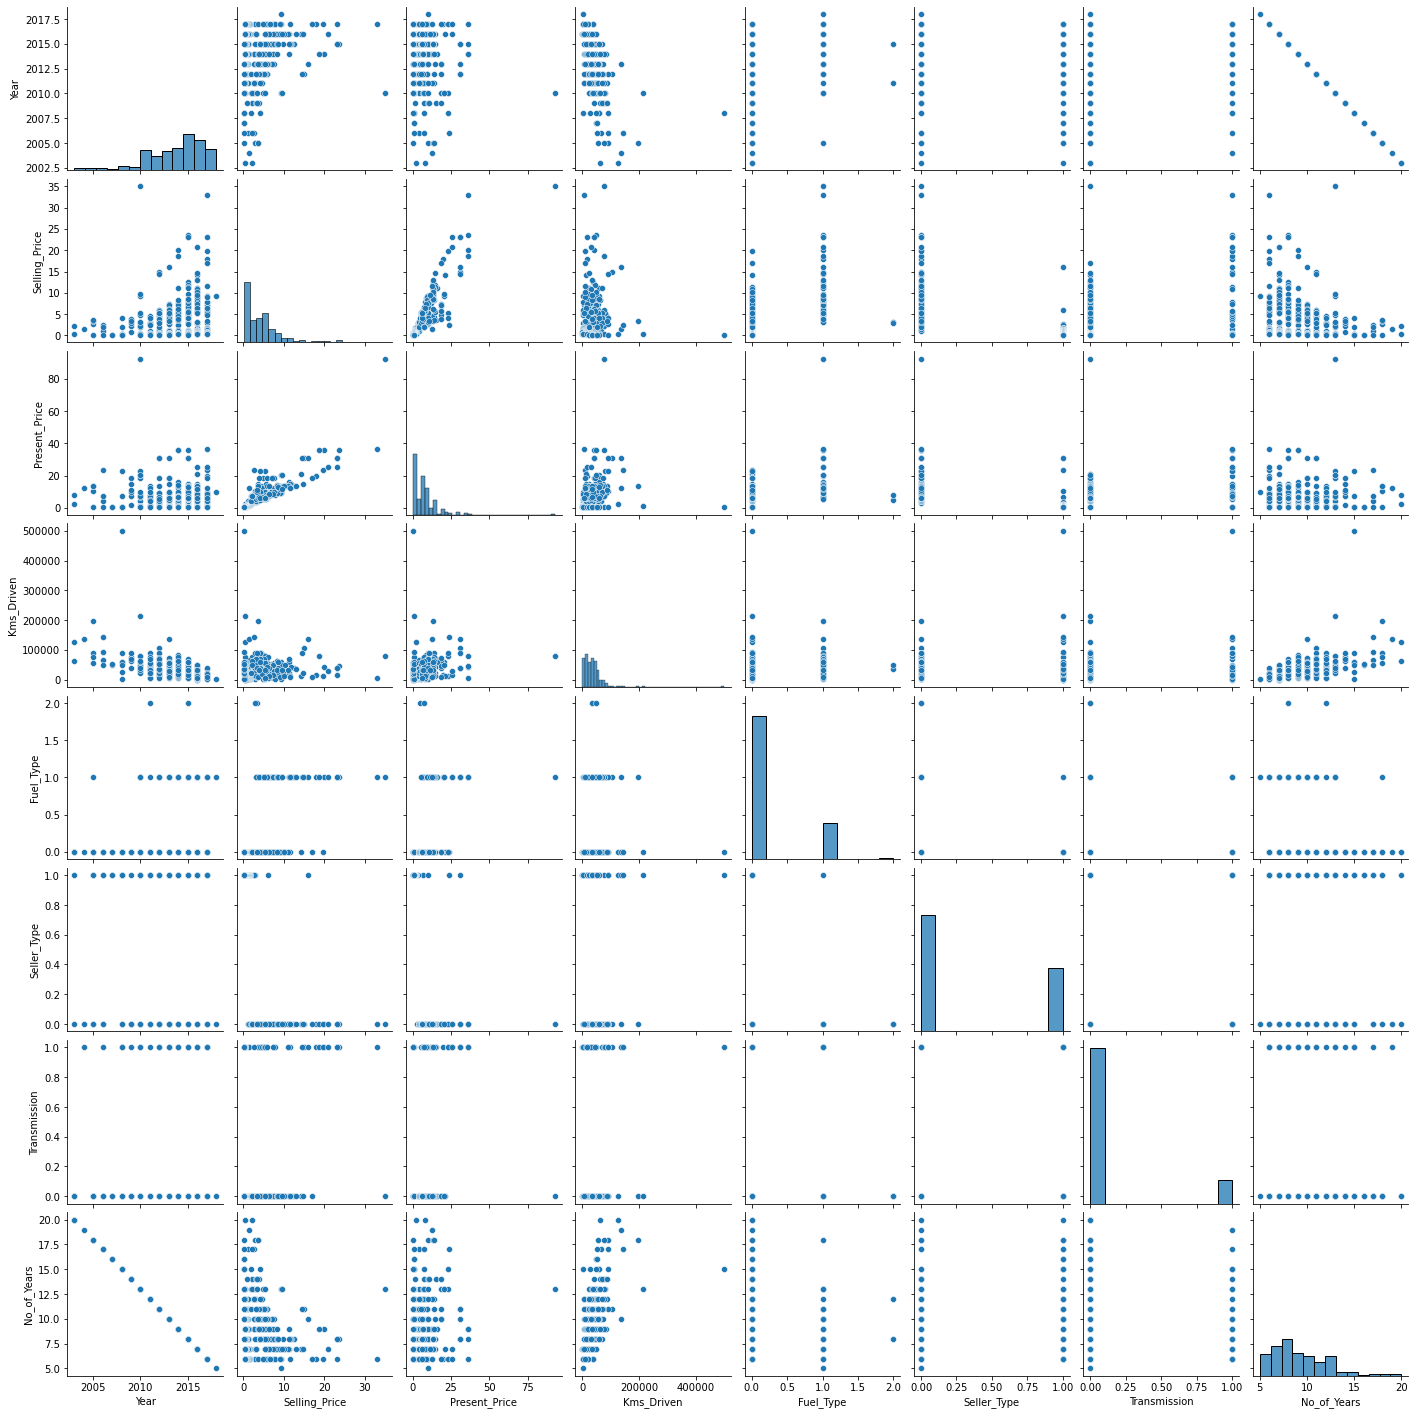

In [20]:
# visualization of data
sns.pairplot(car_data)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)

# Model's Selection

 1. Linear Regression

In [22]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [24]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [25]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8791422111041751


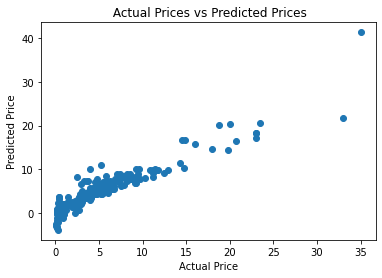

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [28]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8374519294567614


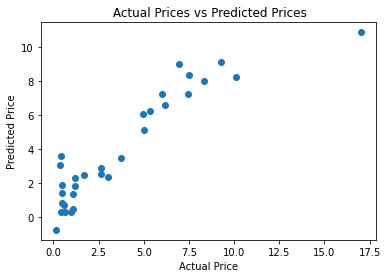

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [30]:
# loading the linear regression model
lass_reg_model = Lasso()

In [31]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [32]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [33]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8436911624554668


Visualize the actual prices and Predicted prices

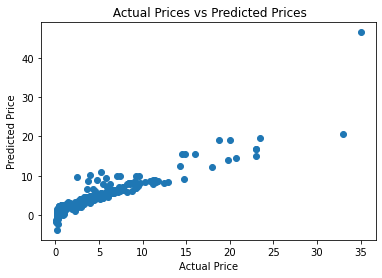

In [34]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [35]:
# prediction on Test data
test_data_prediction = lass_reg_model.predict(X_test)

In [36]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8392278483757646


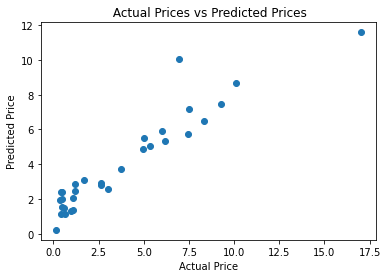

In [37]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2-Random model

In [38]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Define the random forest regression model
RFR = RandomForestRegressor()

# Train the model
RFR.fit(X_train, Y_train)


RandomForestRegressor()

In [39]:
# prediction on Training data
training_data_prediction = RFR.predict(X_train)

In [40]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9840634767570146


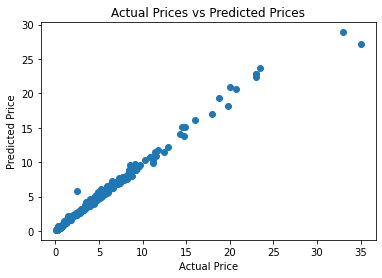

In [41]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [42]:
# prediction on Testing data
test_car_data_prediction = RFR.predict(X_test)

In [43]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_car_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9806009616080712


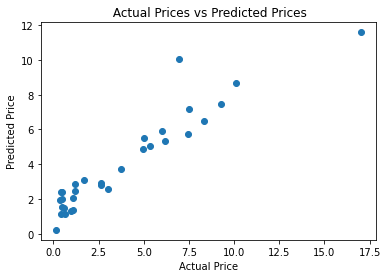

In [44]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [45]:
RFR.score(X_test,Y_test)

0.9806009616080712

3- KNN Model

In [46]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the k-Nearest Neighbors regression model
KN = KNeighborsRegressor(n_neighbors=5)

# Train the model
KN.fit(X_train_scaled, Y_train)

KNeighborsRegressor()

In [47]:
# prediction on Training data
training_data_prediction = KN.predict(X_train_scaled)

In [48]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.924393189172159


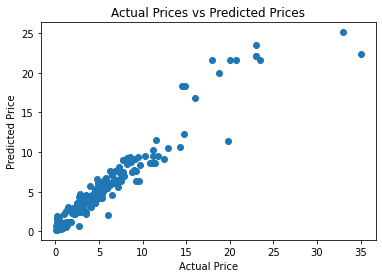

In [49]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [50]:
# prediction on Testing data
test_data_prediction = KN.predict(X_test_scaled)

In [51]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8648570262085453


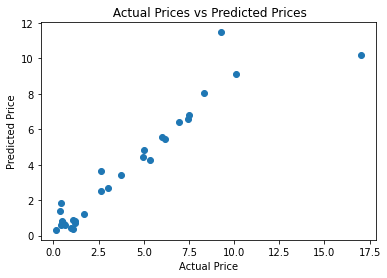

In [52]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [53]:
KN.score(X_test_scaled,Y_test)

0.8648570262085453

#Task 3- 

In [54]:
 X = np.asarray(X)
 Y = np.asarray(Y)

# Comparing the models with default hyperparameter values using Cross Validation

In [55]:
# list of models
models = [LinearRegression(), KNeighborsRegressor(), RandomForestClassifier(random_state=42)]